In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

# Ignore all warnings
warnings.filterwarnings("ignore")


plt.style.use('ggplot')
from matplotlib import style

# setting style
style.available
style.use('ggplot')

In [2]:
# Import the data
df = pd.read_excel('Data/Telco_customer_churn.xlsx')

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [5]:
df[['Monthly Charges', 'Total Charges',	'Churn Label', 'Churn Value', 'Churn Score', 'CLTV']].describe()

,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,0.265370,58.699418,4400.295755
std,30.090047,0.441561,21.525131,1183.057152
min,18.250000,0.000000,5.000000,2003.000000
25%,35.500000,0.000000,40.000000,3469.000000
50%,70.350000,0.000000,61.000000,4527.000000
75%,89.850000,1.000000,75.000000,5380.500000
max,118.750000,1.000000,100.000000,6500.000000


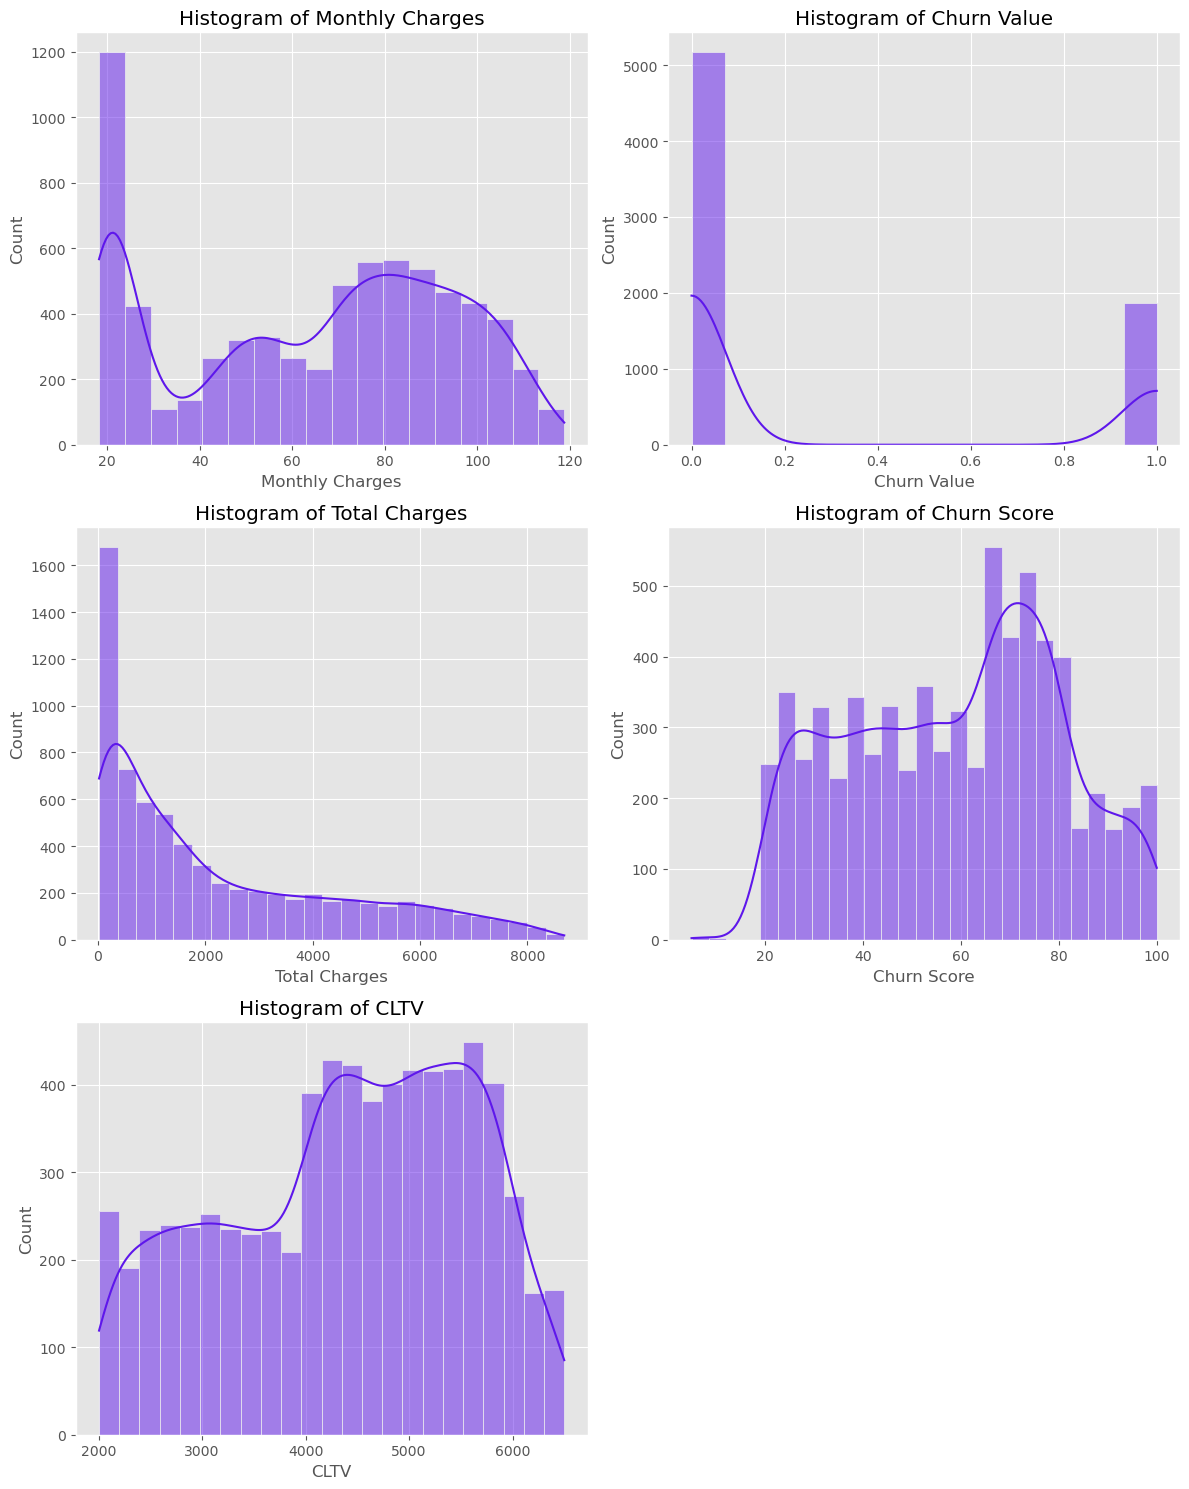

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = df[['Monthly Charges', 'Churn Value', 'Total Charges', 'Churn Score', 'CLTV']]

# Set the color of the histograms
hue_color = "#5e17eb"

# Convert columns to numeric, coercing errors (non-numeric values) to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Number of columns to plot
num_columns = len(data.columns)

# Determine the number of rows and columns for subplots
ncols = 2
nrows = (num_columns + 1) // ncols

# Create a grid for the histograms
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 5 * nrows))  # Adjust figsize as needed

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(data.columns):
    sns.histplot(data[column].dropna(), color=hue_color, kde=True, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_title(f'Histogram of {column}')

# Hide any unused subplots
for j in range(num_columns, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


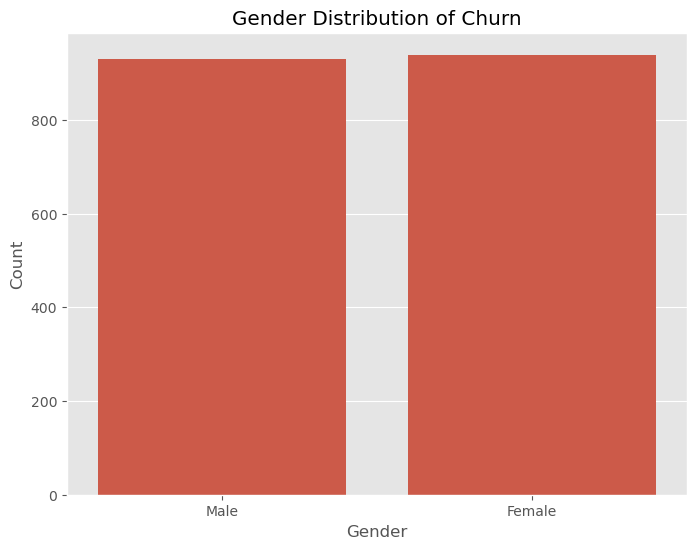

In [7]:
# Filter for customers who have churned (Churn Value = 1)
churned_customers = df[df['Churn Value'] == 1]

# Plot the distribution of gender among customers who have churned
plt.figure(figsize=(8, 6))
sns.countplot(data=churned_customers, x='Gender')
plt.title('Gender Distribution of Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

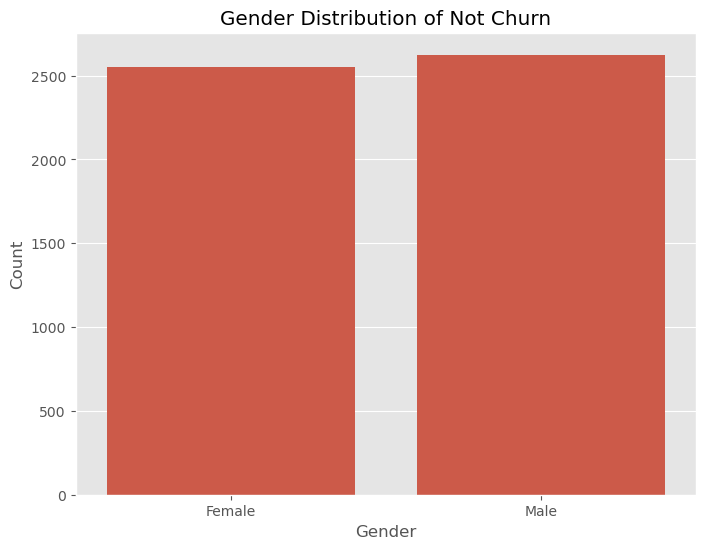

In [8]:
# Filter for customers who have not churned (Churn Value = 0)
not_churned_customers = df[df['Churn Value'] == 0]

# Plot the distribution of gender among customers who have not churned
plt.figure(figsize=(8, 6))
sns.countplot(data=not_churned_customers, x='Gender')
plt.title('Gender Distribution of Not Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

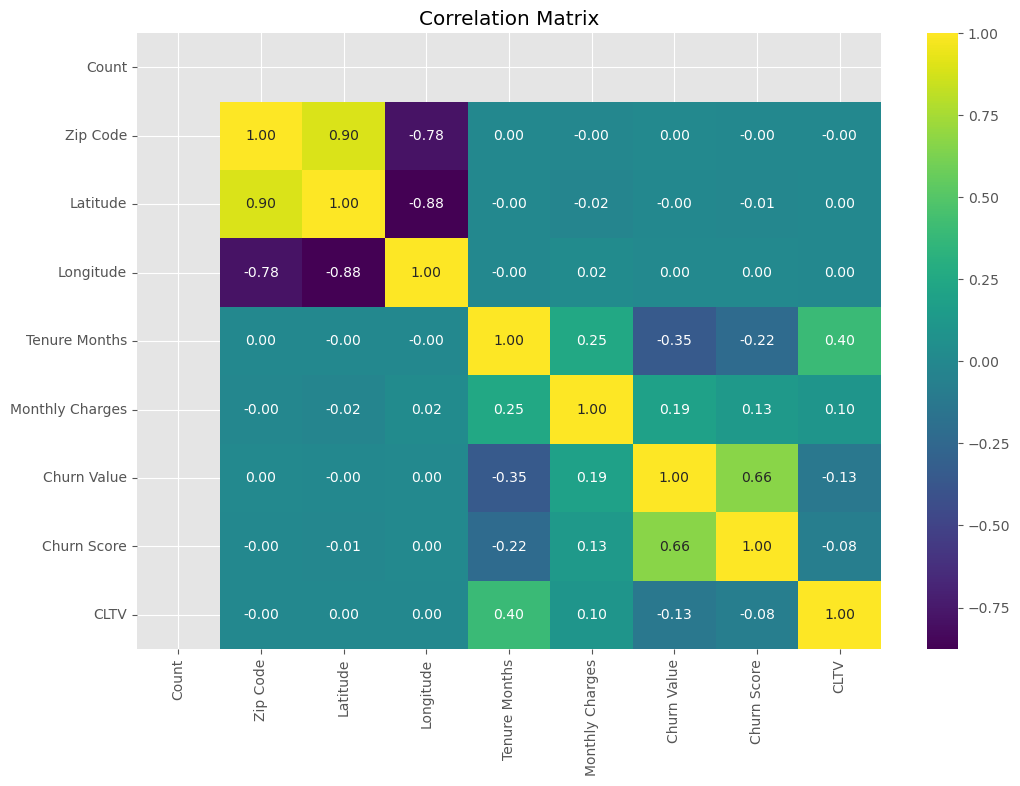

In [9]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="viridis")
plt.title('Correlation Matrix')
plt.show()

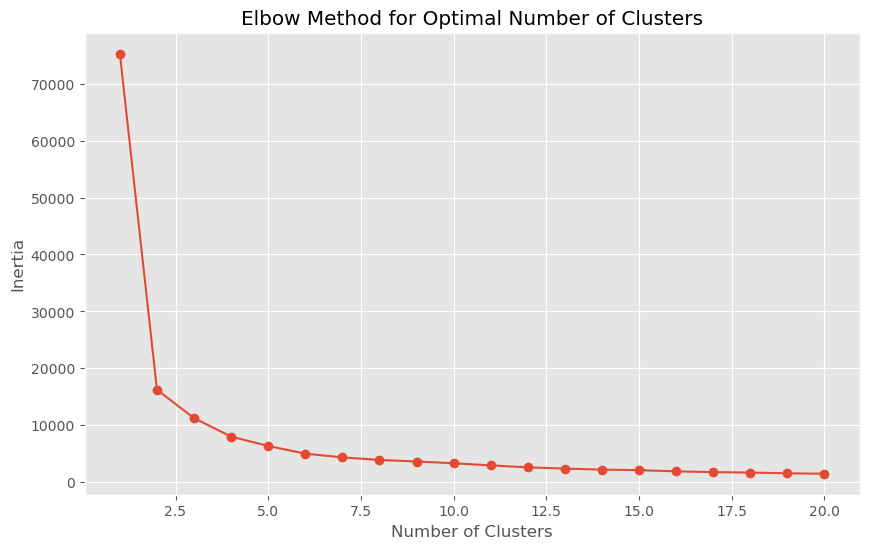

In [10]:
# List to store the inertia values
inertia = []

# Test different numbers of clusters
for n_clusters in range(1, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df[['Latitude', 'Longitude']])
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


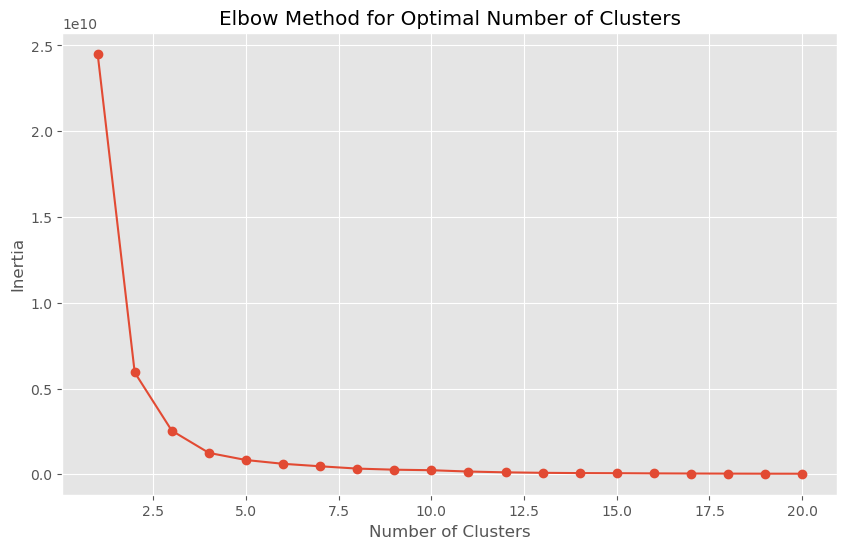

In [11]:

# List to store the inertia values
inertia = []

# Test different numbers of clusters
for n_clusters in range(1, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df[['Zip Code']])
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()
